In [1]:
import tensorflow as tf
tf.test.gpu_device_name()

''

In [2]:
import os
os.environ['CUDA_VISIBLE_DEVICES'] = "0"

In [39]:
import tensorflow as tf
import cv2
import os 
import matplotlib.pyplot as plt
import numpy as np
from google.colab import drive
drive.mount('/content/gdrive')

from sklearn.model_selection import train_test_split


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
# dataset_path = "/content/gdrive/MyDrive/Projects/ComputerVision/FER-Tensorflow/dataset.zip"

In [ ]:
# !7z x /content/gdrive/MyDrive/Projects/ComputerVision/FER-Tensorflow/dataset.zip -o/content/gdrive/MyDrive/Projects/ComputerVision/FER-Tensorflow 

In [40]:
img_array = cv2.imread("/content/gdrive/MyDrive/Projects/ComputerVision/FER-Tensorflow/dataset/train/0/Training_10851653.jpg")

In [41]:
img_array.shape


(48, 48, 3)

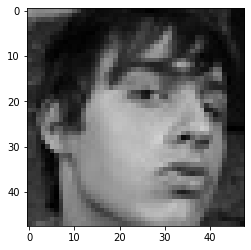

In [42]:
plt.imshow(img_array)

In [43]:
DataDirectory = "/content/gdrive/MyDrive/Projects/ComputerVision/FER-Tensorflow/dataset/train/"

In [44]:
Classes = ["0", "1", "2", "3", "4", "5", "6"] ##list of classes

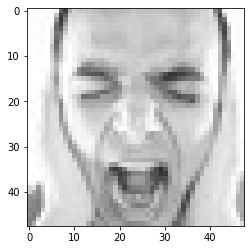

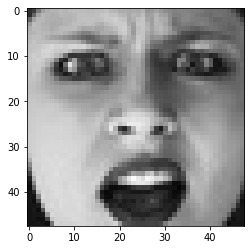

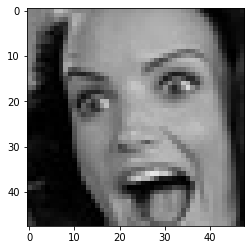

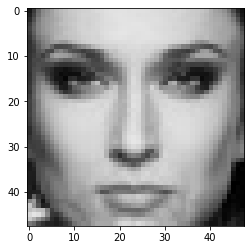

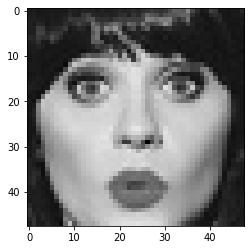

In [45]:
for category in Classes:
    path = os.path.join(DataDirectory, category) ##OS path will join the paths together with a / seperator
    for img in os.listdir(path): #Will give me all files and directories in the specified path 
        img_array = cv2.imread(os.path.join(path,img)) # joins the path and image together 
        plt.imshow(cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)) #Shows images ing grey 
        plt.show()
        break

## Change size of image

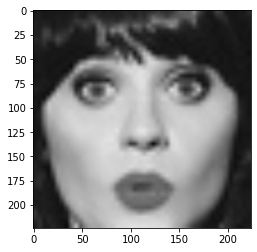

In [11]:
img_size = 224
new_array = cv2.resize(img_array, (img_size, img_size)) #Resize image arrays to 224
plt.imshow(cv2.cvtColor(new_array, cv2.COLOR_BGR2RGB))
plt.show()

In [12]:
new_array.shape

(224, 224, 3)

## Read all the images and convert them to array

In [13]:
training_Data = []

def create_training_Data():
    for category in Classes:
        path = os.path.join(DataDirectory, category) ## OS path will join the paths together with a / seperator
        class_num = Classes.index(category) #get the label, class name is our label
        for img in os.listdir(path): #Will give me all files and directories in the specified path 
            try:
                img_array = cv2.imread(os.path.join(path,img)) # joins the path and image together 
                new_array = cv2.resize(img_array, (img_size, img_size)) #Resize image arrays to 224
                # print(class_num)
                training_Data.append([new_array,class_num])
            except Exception as e:
                pass

In [14]:
create_training_Data()

print(len(training_Data))

Get the shape / sixe of out data 

In [15]:
temp = np.array(training_Data, dtype=object)

In [16]:
# Shows we have in one index of our array our images and in another the labels
temp.shape

(19647, 2)

# Shuffle data and split our training

In [17]:
import random

# Shuffling so that the model does not learn the sequence
random.shuffle(training_Data)
split_idx = len(training_Data) // 3
train_data = training_Data[:split_idx]

In [18]:
X = [] ##Data/features
y =[] ##Label

# Creating for loop that splits pout tranng data arra into its features and labels
for features,label in train_data:
    X.append(features)
    y.append(label)


X = np.array(X).reshape(-1, img_size,img_size,3) ## converting it to 4 dimensions -1 at the front puts 1 at the end

In [19]:
X.shape

(6549, 224, 224, 3)

In [20]:
# normalize the data
# Doing it by 255 because the max level is black which represnts 255

# for i in range(0,len(training_Data)):
X = X/255.0


In [21]:

Y = np.array(y)

## Deep learning model for training - Transfer learning

What is Transfer Learning:

Transfer learning is a machine learning technique that involves reusing a pre-trained model on a new task or domain. The idea is to use the knowledge that a model has gained from learning one task or domain to improve its performance on a different but related task or domain.

Transfer learning is particularly useful when there is limited labeled data available for a new task or when training a model from scratch on a new task is computationally expensive. By using a pre-trained model, the model can leverage the representations learned from the original task to improve performance on the new task.

There are several approaches to transfer learning, including fine-tuning, where the pre-trained model is further trained on the new task with a smaller learning rate, and feature extraction, where the pre-trained model is used to extract features that are then fed into a new model trained on the new task. Transfer learning has been applied in a wide range of applications, including natural language processing, computer vision, and speech recognition.


In [22]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [23]:
model = tf.keras.applications.MobileNetV2() ## Pretrained model

14536120/14536120 [==============================] - 0s 0us/step


In [24]:
model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                              

## Transfer learning - Tuning 

In [25]:
# Input
base_input = model.layers[0].input

In [26]:
# Get the 2nd to last layer
base_output = model.layers[-2].output

In [27]:
base_output

<KerasTensor: shape=(None, 1280) dtype=float32 (created by layer 'global_average_pooling2d')>

In [28]:
final_output = layers.Dense(128)(base_output)##We are taking the output of our 2nd to last layer, and creating a new layer after that ayer
final_ouput = layers.Activation('relu')(final_output) ## Activation function
final_output = layers.Dense(64)(final_ouput)
final_ouput = layers.Activation('relu')(final_output) 
final_output = layers.Dense(7,activation ='softmax')(final_ouput)## As our data has 7 classes

In [29]:
# Output
final_output

<KerasTensor: shape=(None, 7) dtype=float32 (created by layer 'dense_2')>

In [30]:
new_model = keras.Model(inputs = base_input, outputs = final_output)

In [31]:
new_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                                             

Sparse Categorical Cross-entropy is a loss function used in machine learning and deep learning models to measure the difference between the predicted and actual class labels of categorical data. It is a variant of the cross-entropy loss function, commonly used in classification problems.

In contrast to categorical cross-entropy, sparse categorical cross-entropy is used when the labels are integers instead of one-hot encoded vectors. In other words, the ground truth label is represented as a single integer value, while the predicted output is represented as a probability distribution over multiple classes.

The sparse categorical cross-entropy function calculates the loss by computing the cross-entropy between the predicted and actual probability distributions, where the actual class labels are represented as integers. The function returns a scalar value that represents the average loss over all the samples in the batch.

In summary, the sparse categorical cross-entropy loss function is used when dealing with multi-class classification problems with integer labels, where the predicted output is represented as a probability distribution over multiple classes.

When the Neural Network makes a really bad prediction, Cross Entropy will help us take a relatively large step towards a better prediction, this is because the slope of the tangent will be large.

In [32]:
new_model.compile(loss ="sparse_categorical_crossentropy", optimizer = "adam", metrics = ["accuracy"])

In [33]:
new_model.fit(X, Y, epochs = 25)

Epoch 1/25
205/205 [==============================] - 178s 800ms/step - loss: 0.9249 - accuracy: 0.6508
Epoch 2/25
205/205 [==============================] - 157s 767ms/step - loss: 0.6885 - accuracy: 0.7487
Epoch 3/25
205/205 [==============================] - 156s 760ms/step - loss: 0.6100 - accuracy: 0.7751
Epoch 4/25
205/205 [==============================] - 156s 760ms/step - loss: 0.5451 - accuracy: 0.7974
Epoch 5/25
205/205 [==============================] - 162s 789ms/step - loss: 0.4706 - accuracy: 0.8250
Epoch 6/25
205/205 [==============================] - 155s 759ms/step - loss: 0.4193 - accuracy: 0.8511
Epoch 7/25
205/205 [==============================] - 154s 753ms/step - loss: 0.3783 - accuracy: 0.8572
Epoch 8/25
205/205 [==============================] - 154s 751ms/step - loss: 0.3421 - accuracy: 0.8752
Epoch 9/25
205/205 [==============================] - 158s 769ms/step - loss: 0.2829 - accuracy: 0.8983
Epoch 10/25
205/205 [==============================] - 156s 760m

In [34]:
new_model.save("/content/gdrive/MyDrive/Projects/ComputerVision/FER-Tensorflow/my_model1.h5")

In [49]:
new1_model = tf.keras.models.load_model("/content/gdrive/MyDrive/Projects/ComputerVision/FER-Tensorflow/my_model1.h5")

In [52]:
frame = cv2.imread("/content/gdrive/MyDrive/Projects/ComputerVision/FER-Tensorflow/happyboy6.jpeg")

In [54]:
frame.shape

(408, 612, 3)

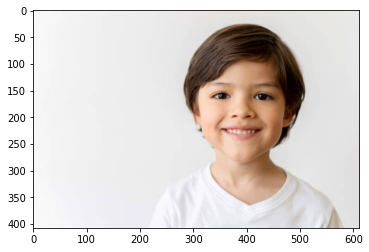

In [55]:
plt.imshow(cv2.cvtColor(frame,cv2.COLOR_BGR2RGB))

In [56]:
# We need to conver our images to gray

In [65]:
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")

In [66]:
gray = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)

In [67]:
gray.shape

(408, 612)

In [68]:
faces = faceCascade.detectMultiScale(gray,1.1,4)
for x,y,w,h in faces:
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = frame[y:y+h, x:x+w]
    cv2.rectangle(frame,(x,y),(x+w, y+h),(0,255,0),2)
    facess = faceCascade.detectMultiScale(roi_gray)
    if len(facess)==0:
        print("Face not detected")
    else:
        for(ex,ey,ew,eh) in facess:
            face_roi = roi_color[ey:ey+eh, ex:ex +ew]

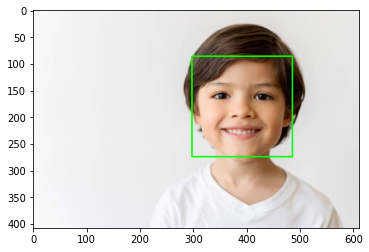

In [69]:
plt.imshow(cv2.cvtColor(frame,cv2.COLOR_BGR2RGB))

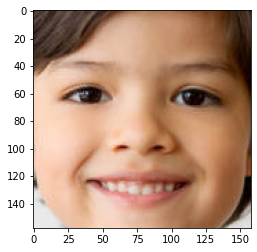

In [70]:
plt.imshow(cv2.cvtColor(face_roi,cv2.COLOR_BGR2RGB))

In [71]:
# onverting to 244
final_image = cv2.resize(face_roi,(224,224))
# add extra dimension
final_image = np.expand_dims(final_image,axis =0)
# mormalize 
final_image =final_image/255.0

In [72]:
Predictions = new1_model.predict(final_image)

1/1 [==============================] - 1s 833ms/step


In [73]:
Predictions[0]

array([5.2565864e-12, 1.4807043e-12, 3.0095394e-22, 9.9999928e-01,
       1.5948942e-08, 3.0306734e-19, 7.4231247e-07], dtype=float32)

In [74]:
np.argmax(Predictions)

3